# Keras Sequential model

**Author:** [fchollet](https://twitter.com/fchollet)<br>
**Date created:** 2020/04/12<br>
**Last modified:** 2023/06/25<br>
**Description:** Complete guide to the Sequential model.

## Setup

In [1]:
import keras
from keras import layers
from keras import ops

2025-04-12 01:12:08.893795: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744413128.915049  186302 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744413128.921381  186302 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1744413128.937977  186302 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1744413128.937996  186302 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1744413128.937998  186302 computation_placer.cc:177] computation placer alr

## When to use a Sequential model

A `Sequential` model is appropriate for **a plain stack of layers**
where each layer has **exactly one input tensor and one output tensor**.

Schematically, the following `Sequential` model:

In [2]:
# Define Sequential model with 3 layers
model = keras.Sequential(
    [
        keras.Input(shape=(3,1)),
        layers.Dense(2, activation="relu", name="layer1"),
        layers.Dense(3, activation="relu", name="layer2"),
        layers.Dense(4, name="layer3"),
    ]
)


I0000 00:00:1744413130.756751  186302 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3486 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1


A Sequential model is **not appropriate** when:

- Your model has multiple inputs or multiple outputs
- Any of your layers has multiple inputs or multiple outputs
- You need to do layer sharing
- You want non-linear topology (e.g. a residual connection, a multi-branch
model)

## Creating a Sequential model

You can create a Sequential model by passing a list of layers to the Sequential
constructor:

In [3]:
model = keras.Sequential(
    [
        layers.Dense(2, activation="relu"),
        layers.Dense(3, activation="relu"),
        layers.Dense(4),
    ]
)

Its layers are accessible via the `layers` attribute:

In [4]:
model.layers

[<Dense name=dense, built=False>,
 <Dense name=dense_1, built=False>,
 <Dense name=dense_2, built=False>]

You can also create a Sequential model incrementally via the `add()` method:

In [5]:
model = keras.Sequential()
model.add(layers.Dense(2, activation="relu"))
model.add(layers.Dense(3, activation="relu"))
model.add(layers.Dense(4))

Note that there's also a corresponding `pop()` method to remove layers:
a Sequential model behaves very much like a list of layers.

In [6]:
model.pop()
print(len(model.layers))  # 2

2


Also note that the Sequential constructor accepts a `name` argument, just like
any layer or model in Keras. This is useful to annotate TensorBoard graphs
with semantically meaningful names.

In [7]:
model = keras.Sequential(name="my_sequential")
model.add(layers.Dense(2, activation="relu", name="layer1"))
model.add(layers.Dense(3, activation="relu", name="layer2"))
model.add(layers.Dense(4, name="layer3"))

## Specifying the input shape in advance

Generally, all layers in Keras need to know the shape of their inputs
in order to be able to create their weights. So when you create a layer like
this, initially, it has no weights:

In [8]:
layer = layers.Dense(3)
layer.weights  # Empty

[]

It creates its weights the first time it is called on an input, since the shape
of the weights depends on the shape of the inputs:

In [9]:
# Call layer on a test input
x = ops.ones((1, 4)) # creates a tensor of shape (1, 4) filled with ones.
y = layer(x)
layer.weights  # Now it has weights, of shape (4, 3) and (3,)

[<Variable path=dense_6/kernel, shape=(4, 3), dtype=float32, value=[[-0.5044515   0.05308157  0.14716184]
  [ 0.7177764   0.79038775 -0.24358672]
  [-0.37373823  0.14540124 -0.49619964]
  [ 0.7793262   0.2937708   0.74665713]]>,
 <Variable path=dense_6/bias, shape=(3,), dtype=float32, value=[0. 0. 0.]>]

Naturally, this also applies to Sequential models. When you instantiate a
Sequential model without an input shape, it isn't "built": it has no weights
(and calling
`model.weights` results in an error stating just this). The weights are created
when the model first sees some input data:

In [10]:
model = keras.Sequential(
    [
        #keras.Input(shape=(4,)), # if this removed, No weights defined at this stage!
        layers.Dense(2, activation="relu"),
        layers.Dense(3, activation="relu"),
        layers.Dense(4),
    ]
)

model.weights


[]

In [11]:
# Call the model on a test input
# performs a forward pass of the input x through the model.
x = ops.ones((1, 4))
y = model(x)
# Now we have weights becuase input shape is defined
model.weights

[<Variable path=sequential_3/dense_7/kernel, shape=(4, 2), dtype=float32, value=[[ 0.27308106  0.92928123]
  [-0.43627477 -0.99500155]
  [-0.77765346 -0.7791717 ]
  [-0.9179177   0.26103258]]>,
 <Variable path=sequential_3/dense_7/bias, shape=(2,), dtype=float32, value=[0. 0.]>,
 <Variable path=sequential_3/dense_8/kernel, shape=(2, 3), dtype=float32, value=[[ 0.20243871  1.0758667  -0.10924119]
  [-0.09442687 -0.52260804  0.633379  ]]>,
 <Variable path=sequential_3/dense_8/bias, shape=(3,), dtype=float32, value=[0. 0. 0.]>,
 <Variable path=sequential_3/dense_9/kernel, shape=(3, 4), dtype=float32, value=[[ 0.11011732 -0.16411787 -0.8681091  -0.23925018]
  [ 0.46230102 -0.2525509  -0.5862144   0.42887437]
  [ 0.7475811   0.3619343   0.55859923 -0.737006  ]]>,
 <Variable path=sequential_3/dense_9/bias, shape=(4,), dtype=float32, value=[0. 0. 0. 0.]>]

In [12]:
y

<tf.Tensor: shape=(1, 4), dtype=float32, numpy=array([[0., 0., 0., 0.]], dtype=float32)>

Once a model is "built", you can call its `summary()` method to display its
contents:

In [13]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (1, 2)                 │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (1, 3)                 │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (1, 4)                 │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35 (140.00 B)

 Trainable params: 35 (140.00 B)

 Non-trainable params: 0 (0.00 B)

However, it can be very useful when building a Sequential model incrementally
to be able to display the summary of the model so far, including the current
output shape. In this case, you should start your model by passing an `Input`
object to your model, so that it knows its input shape from the start:

In [14]:
model = keras.Sequential()
model.add(keras.Input(shape=(4,)))
model.add(layers.Dense(2, activation="relu"))

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 2)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10 (40.00 B)

 Trainable params: 10 (40.00 B)

 Non-trainable params: 0 (0.00 B)

Note that the `Input` object is not displayed as part of `model.layers`, since
it isn't a layer:

In [15]:
model.layers

[<Dense name=dense_10, built=True>]

Models built with a predefined input shape like this always have weights (even
before seeing any data) and always have a defined output shape.

- In general, it's a recommended best practice to always specify the input shape
of a Sequential model in advance if you know what it is.

- When building a new Sequential architecture, it's useful to incrementally stack
layers with `add()` and frequently print model summaries. To
enable you to monitor how a stack of layers is working.

## Training, evaluation, and inference

Training, evaluation, and inference work exactly in the same way for models
built using the functional API as for `Sequential` models.

The `Model` class offers a built-in training loop (the `fit()` method)
and a built-in evaluation loop (the `evaluate()` method). Note
that you can easily customize these loops to implement your own training routines.

Here, load the MNIST image data, reshape it into vectors,
fit the model on the data (while monitoring performance on a validation split),
then evaluate the model on the test data:

In [16]:
model = keras.Sequential()
model.add(keras.Input(shape=(784,)))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,050 (215.04 KB)

 Trainable params: 55,050 (215.04 KB)

 Non-trainable params: 0 (0.00 B)

Here's what the typical end-to-end workflow looks like, consisting of:

- Training
- Validation on a holdout set generated from the original training data
- Evaluation on the test data

We'll use MNIST data for this example.

In [17]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess the data (these are NumPy arrays)
x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

# Reserve 10,000 samples for validation
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

## The `compile()` method: specifying a loss, metrics, and an optimizer

To train a model with `fit()`, you need to specify a loss function, an optimizer, and
optionally, some metrics to monitor.

You pass these to the model as arguments to the `compile()` method:

Many built-in optimizers, losses, and metrics are available

We have to specify the training configuration (optimizer, loss, metrics):

* Use `SparseCategoricalCrossentropy` and `SparseCategoricalAccuracy` when
your labels are provided as integers (e.g., [0, 1, 2, ...]) rather than one-hot encoded vectors.

* Use `categorical_crossentropy` and `categorical_accuracy`, when	Multi-class classification with one-hot labels	[0, 0, 1], [1, 0, 0]
* Use `binary_crossentropy` and `BinaryAccuracy`, when	Binary classification	[0, 1, 1, 0]

In [18]:
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=1e-3),  # Optimizer
    # Loss function to minimize
    loss=keras.losses.SparseCategoricalCrossentropy(),
    # List of metrics to monitor
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

Now, let's review each piece of this workflow in detail.

The `metrics` argument should be a list -- your model can have any number of metrics.

If your model has multiple outputs, you can specify different losses and metrics for
each output, and you can modulate the contribution of each output to the total loss of
the model. You will find more details about this in the **Passing data to multi-input,
multi-output models** section.

Note that if you're satisfied with the default settings, in many cases the optimizer,
loss, and metrics can be specified via string identifiers as a shortcut:

In [19]:
model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)

We call `fit()`, which will train the model by slicing the data into "batches" of size
`batch_size`, and repeatedly iterating over the entire dataset for a given number of
`epochs`.

In [20]:
print("Fit model on training data")
history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=2,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(x_val, y_val),
)

Fit model on training data
Epoch 1/2


2025-04-12 01:12:13.784480: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 156800000 exceeds 10% of free system memory.
2025-04-12 01:12:13.922969: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 156800000 exceeds 10% of free system memory.
I0000 00:00:1744413134.578135  186413 service.cc:152] XLA service 0x794ae0003af0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744413134.578154  186413 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce GTX 1050, Compute Capability 6.1
2025-04-12 01:12:14.597288: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1744413134.685004  186413 cuda_dnn.cc:529] Loaded cuDNN version 90300


 56/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.5649 - sparse_categorical_accuracy: 0.5465

I0000 00:00:1744413135.606734  186413 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.5733 - sparse_categorical_accuracy: 0.8410 - val_loss: 0.3036 - val_sparse_categorical_accuracy: 0.9113
Epoch 2/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1803 - sparse_categorical_accuracy: 0.9460 - val_loss: 0.1403 - val_sparse_categorical_accuracy: 0.9594


*Parameter	Description*

**x**		: Input data (NumPy array, Tensor, or Dataset)

**y**		: Target labels (same format as output of the model)

**batch_size**	: Number of samples per gradient update (default: 32)

**epochs**	: Number of passes through the entire dataset

**validation_data**	: Tuple (val_x, val_y) for evaluating model at end of each epoch

**shuffle**	: Whether to shuffle training data before each epoch (default: True)

**verbose**		: 0 = silent, 1 = progress bar, 2 = one line per epoch

The returned `history` object holds a record of the loss values and metric values
during training:

In [21]:
print(history.history)

{'loss': [0.34744855761528015, 0.17029716074466705], 'sparse_categorical_accuracy': [0.9023799896240234, 0.9497600197792053], 'val_loss': [0.30355894565582275, 0.14027070999145508], 'val_sparse_categorical_accuracy': [0.911300003528595, 0.9593999981880188]}


We evaluate the model on the test data via `evaluate()`:

In [22]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(x_test, y_test, batch_size=128)
print("test loss, test acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(x_test[:3])
print("predictions shape:", predictions.shape)

Evaluate on test data
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1642 - sparse_categorical_accuracy: 0.9503
test loss, test acc: [0.14707498252391815, 0.9559000134468079]
Generate predictions for 3 samples
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step
predictions shape: (3, 10)


### Exercise: Try different Optimizers:

- `SGD()` (with or without momentum)
- `Adam()`
- etc.

Incraese number of batch_size, epochs and notice the difference


# Self-Sudy: Keras Functional API

**Author:** [fchollet](https://twitter.com/fchollet)<br>
**Date created:** 2019/03/01<br>
**Last modified:** 2023/06/25<br>
**Description:** Complete guide to the functional API.

## Introduction

The Keras *functional API* is a way to create models that are more flexible
than the `keras.Sequential` API. The functional API can handle models
with non-linear topology, shared layers, and even multiple inputs or outputs.

The main idea is that a deep learning model is usually
a directed acyclic graph (DAG) of layers.
So the functional API is a way to build *graphs of layers*.

Consider the following model:

<div class="k-default-codeblock">
```
(input: 784-dimensional vectors)
       ↧
[Dense (64 units, relu activation)]
       ↧
[Dense (64 units, relu activation)]
       ↧
[Dense (10 units, softmax activation)]
       ↧
(output: logits of a probability distribution over 10 classes)
```
</div>

This is a basic graph with three layers.
To build this model using the functional API, start by creating an input node:

In [23]:
inputs = keras.Input(shape=(784,))

The shape of the data is set as a 784-dimensional vector.
The batch size is always omitted since only the shape of each sample is specified.

If, for example, you have an image input with a shape of `(32, 32, 3)`,
you would use:

In [24]:
# Just for demonstration purposes.
img_inputs = keras.Input(shape=(32, 32, 3))

The `inputs` that is returned contains information about the shape and `dtype`
of the input data that you feed to your model.
Here's the shape:

In [25]:
inputs.shape

(None, 784)

Here's the dtype:

In [26]:
inputs.dtype

'float32'

You create a new node in the graph of layers by calling a layer on this `inputs`
object:

In [27]:
dense = layers.Dense(64, activation="relu")
x = dense(inputs)

The "layer call" action is like drawing an arrow from "inputs" to this layer
you created.
You're "passing" the inputs to the `dense` layer, and you get `x` as the output.

Let's add a few more layers to the graph of layers:

In [28]:
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(10)(x)

At this point, you can create a `Model` by specifying its inputs and outputs
in the graph of layers:

In [29]:
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

Let's check out what the model summary looks like:

In [30]:
model.summary()

Model: "mnist_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,050 (215.04 KB)

 Trainable params: 55,050 (215.04 KB)

 Non-trainable params: 0 (0.00 B)

You can also plot the model as a graph:

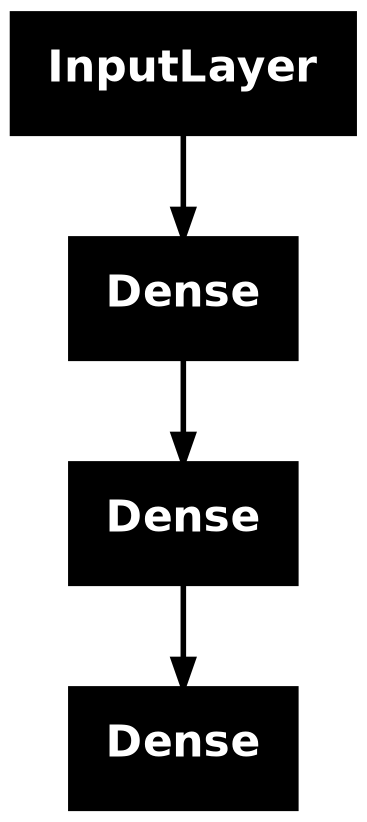

In [31]:
keras.utils.plot_model(model, "my_first_model.png")

And, optionally, display the input and output shapes of each layer
in the plotted graph:

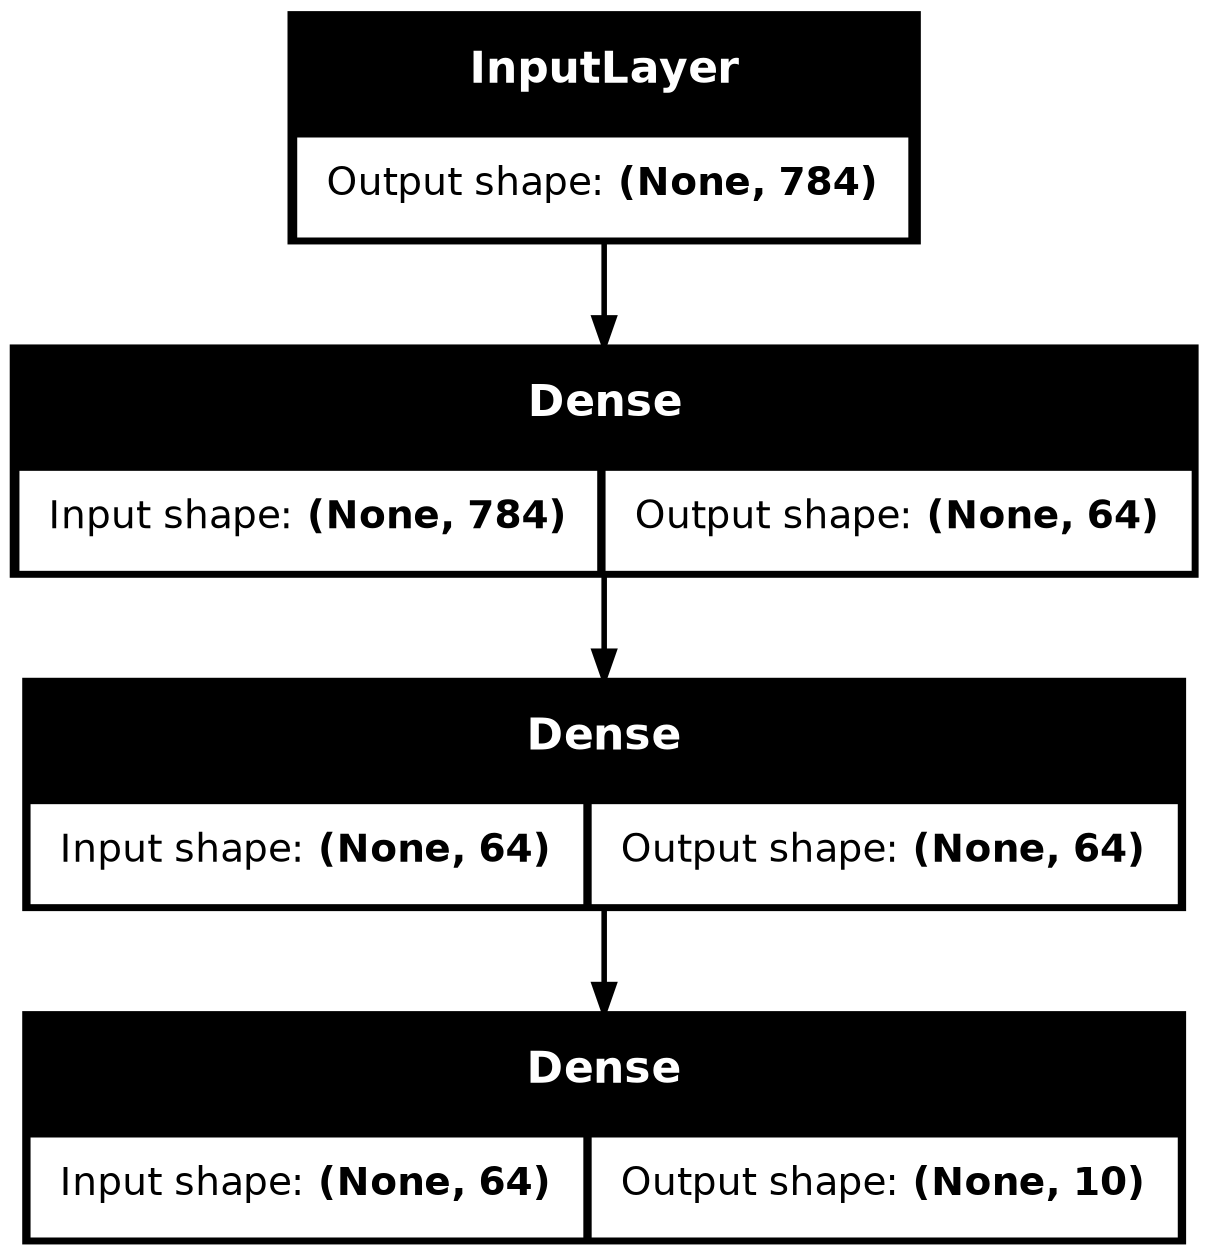

In [32]:
keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)

This figure and the code are almost identical. In the code version,
the connection arrows are replaced by the call operation.

A "graph of layers" is an intuitive mental image for a deep learning model,
and the functional API is a way to create models that closely mirrors this.